In [125]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

import models

combi = pd.read_csv('Dataset/combi.csv')

# decomposed_data = pd.read_csv('Dataset/decomposed_data.csv')
# combi['Radiation'] = decomposed_data['residual']
train_data = combi[combi['Day'] < 280]
val_data = combi[(combi['Day'] >= 280) & (combi['Day'] < 300)]
pred_data = combi[combi['Day'] >= 300]

# train_data = combi[combi['Day'].isin(np.setdiff1d(np.arange(300), np.arange(30)*10 + 1))]
# val_data = combi[combi['Day'].isin(np.arange(30)*10 + 1)]
# pred_data = combi[combi['Day'] >= 300]

# features = [f for f in train_data.columns if f not in ['Radiation', 'index', 'Radiation_day_mean', 'Radiation_day_median', 'Ratio', 'Dir_c']]
features = ['Hour', 'Temp', 'Dir', 'Spd', 'Temp_day_median', 'Spd_day_median', 'Diff_Temp_Day', 'Radiation_hour_median',\
            'Diff_Temp_Hour','Temp_day_max_min', 'Temp_day_max_median', 'Temp_day_relative']

In [126]:
# 每个数据都等于三天的平均
train_data['Radiation_mean'] = train_data['Radiation'].rolling(3).mean()

/tmp/ipykernel_26955/2187106319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Radiation_mean'] = train_data['Radiation'].rolling(3).mean()


In [115]:
# ### 直接出个分析表，好用
# import pandas_profiling
# pfr = pandas_profiling.ProfileReport(combi[features + ['Radiation']])
# pfr.to_file("combi.html")

In [116]:
# 参数设置
Mode = 'train'

if Mode == 'pred':
    train_data = pd.concat([train_data, val_data], axis=0)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

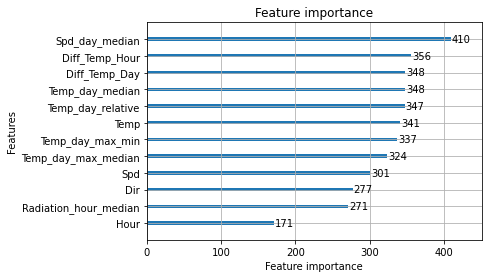

In [117]:
# # linear_regression
# Y_train, Y_val, Y_pred, model = models.linear_regression(train_data, val_data, pred_data, features)

# # # linear_regression_cv
# model, scores = models.linear_regression_cv(train_data, features)

# LightGBM
Y_train, Y_val, Y_pred, model= models.LightGBM(train_data, val_data, pred_data, features, Mode)
lgb.plot_importance(model, max_num_features=20)

# # LightGBM_param_cv
# model= models.LightGBM_param_cv(train_data, val_data, pred_data, features, Mode)

# # XGBoost
# Y_train, Y_val, Y_pred, model= models.XGBoost(train_data, val_data, pred_data, features, Mode)

# # XGBoost_param_cv
# model= models.XGBoost_param_cv(train_data, val_data, pred_data, features, Mode)
# model.best_params_

# # Arima
# result = models.Arima(train_data, val_data, pred_data, features, Mode)

# # Elastic_net
# Y_train, Y_val, Y_pred, model = models.ElasticNet(train_data, val_data, pred_data, features, Mode)

# # Elastic_net_cv
# model = models.ElascicNet_cv(train_data, val_data, pred_data, features, Mode)

train_error: 0.0013131502626774754
val_error 0.006438128710338888
val_error: 0.007612168252647226


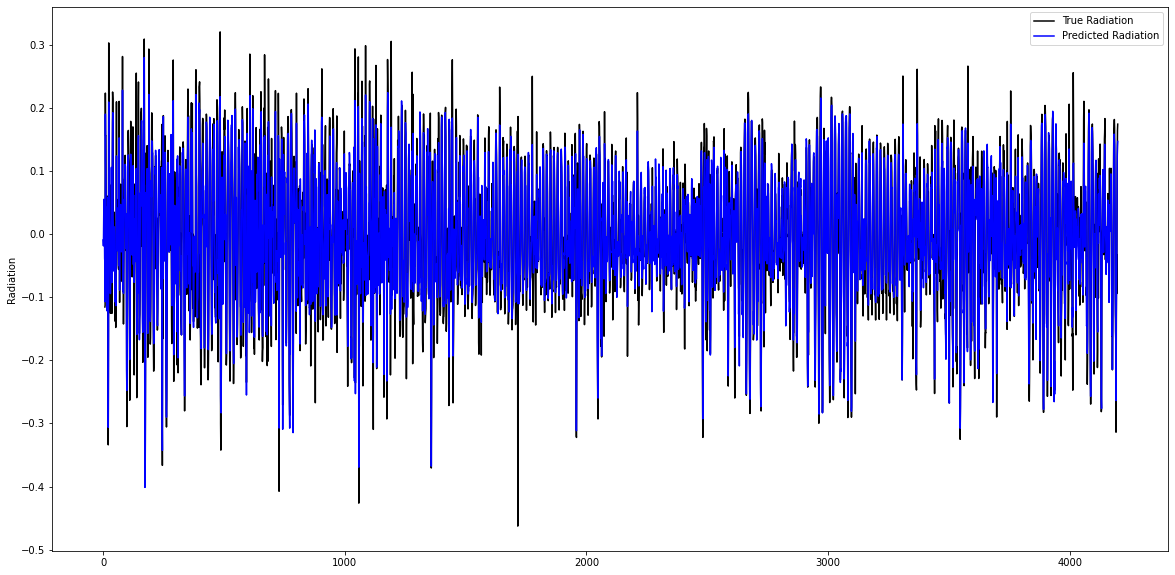

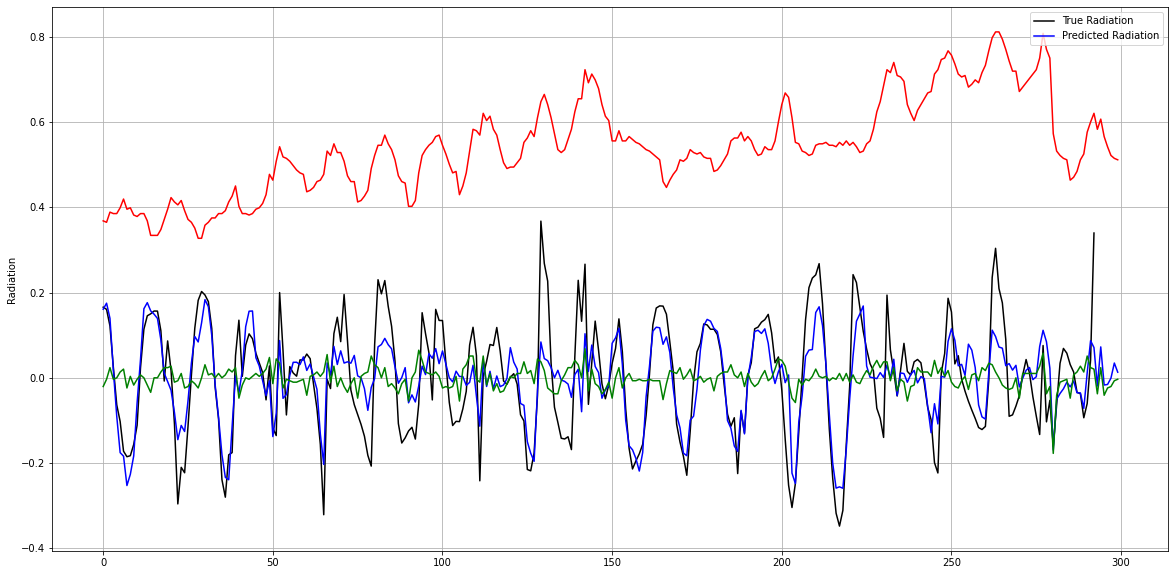

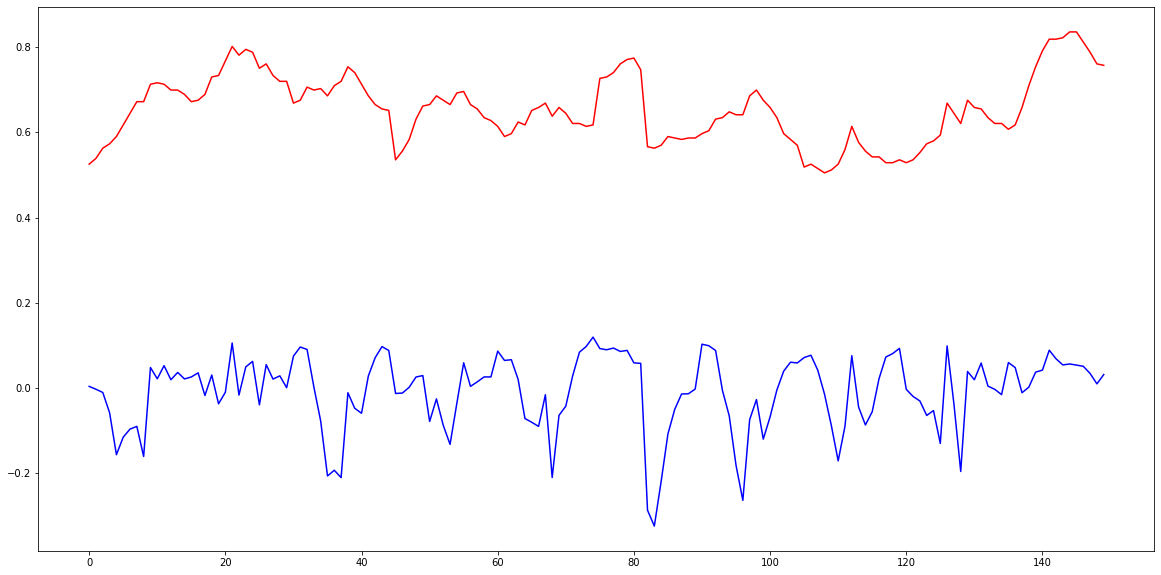

In [118]:
print('train_error:', mean_squared_error(train_data['Radiation'].fillna(0), Y_train))
print('val_error', mean_squared_error(val_data['Radiation'].fillna(0), Y_val))
print('val_error:', mean_squared_error(pred_data['Radiation'].fillna(0), Y_pred))

plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(train_data)), train_data['Radiation'], color='black')
plt.plot(np.arange(len(train_data)), Y_train, color='blue')
plt.ylabel('Radiation')
plt.legend(['True Radiation','Predicted Radiation'],loc='upper right')

plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(val_data)), val_data['Radiation'], color='black')
plt.plot(np.arange(len(val_data)), Y_val, color='blue')
plt.plot(np.arange(len(val_data)), val_data['Temp'], color='red')
plt.plot(np.arange(len(val_data)), val_data['Diff1_Temp_Hour'], color='green')
plt.ylabel('Radiation')
plt.legend(['True Radiation','Predicted Radiation'],loc='upper right')
plt.grid()
plt.show()


plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(pred_data)), Y_pred, color='blue')
plt.plot(np.arange(len(pred_data)), pred_data['Temp'], color='red')


In [119]:
# for i in np.arange(26):
#     plt.figure(figsize=[16, 8])
#     plt.plot(np.arange(150), train_data['Radiation'][i*150:(i+1)*150], color='black')
#     plt.plot(np.arange(150), train_data['Temp'][i*150:(i+1)*150], color='Red')

In [120]:
Y_pred[Y_pred < 0] = 0
dataframe = pd.DataFrame({'Radiation': Y_pred})
dataframe.to_csv("Results/Y_pred.csv", index=False, sep=',')

In [121]:
pred_data.to_csv("Results/pred_data.csv", index=False, sep=',')